In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv")

In [21]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [22]:
data.shape

(10000, 10)

In [23]:
data.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [24]:
no_yes_dict = {"No": 0, "Yes": 1}
data[data.columns[5]] = data[data.columns[5]].map(no_yes_dict)
data[data.columns[-1]] = data[data.columns[-1]].map(no_yes_dict)


In [25]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [26]:
data[data.columns[0]] = data[data.columns[0]].apply(lambda x: int(x[3:]))


In [27]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
2,36,109,5.36,5.83,9,0,3,1,1,0
3,55,122,5.47,5.75,6,1,1,6,1,0
4,4,96,7.91,7.69,7,0,8,10,2,0


In [28]:
corr_matrix = data.corr()

In [29]:
corr_matrix

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
College_ID,1.000000,0.002473,-0.004060,-0.003422,-0.015442,0.012037,-0.003931,-0.005194,0.004903,0.002750
IQ,0.002473,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.004060,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.003422,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.015442,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,0.012037,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003931,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.005194,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.004903,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.002750,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


In [30]:
feature_selected_data = data[[data.columns[1], data.columns[2],
                              data.columns[3], data.columns[7],
                              data.columns[8], data.columns[9]]]


In [31]:
feature_selected_data.head()

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0


In [32]:
placement_equals_1_prior = data[data [data.columns[-1]] ==1].shape[0]/data.shape[0]

In [33]:
placement_equals_1_prior

0.1659

<Axes: >

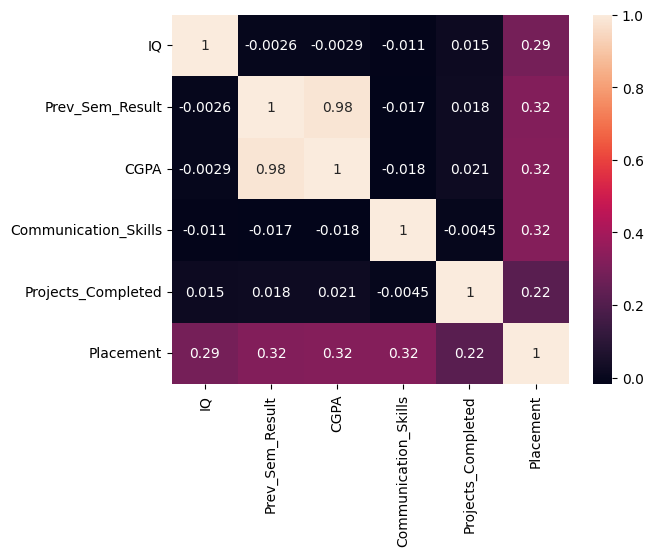

In [34]:
sns.heatmap(feature_selected_data.corr(),annot=True)

In [35]:
placement_equals_1_prior = data[data[data.columns[-1]] == 1].shape[0]/data.shape[0]

In [37]:
data[data["Placement"] == 1].shape[0]

1659

In [ ]:
placement_equals_1_prior